In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv("orig_train.csv")

In [10]:
data.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


In [11]:
# Summary statistics for numerical features
numerical_summary = data.describe()

numerical_summary

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [12]:
# Frequency counts for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_summary = data[categorical_columns].describe()

categorical_summary

,PRODUCT,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,ECONOMIC_SECTOR,EMPLOYEE_NO
count,15097,15097,15097,15097,15097,15097,15097
unique,6,4,5,10,4,18,9
top,C,County capital,Owner without mortgage,University,married,Missing,Missing
freq,6779,7586,8457,5457,8141,4009,3338


In [13]:
# Binary columns (excluding the target variable 'DEFAULT_FLAG' for now)

binary_columns = [col for col in data.columns if data[col].dropna().isin([0, 1]).all() and col != 'DEFAULT_FLAG']

# Summary table for binary columns

binary_summary = data[binary_columns].apply(pd.Series.value_counts).T

binary_summary

,0,1
DEBIT_CARD,9298.0,5799.0
CURRENT_ACCOUNT,7768.0,7329.0
SAVING_ACCOUNT,15091.0,6.0
SALARY_ACCOUNT,13237.0,1860.0
FOREIGN_ACCOUNT,15095.0,2.0
FINALIZED_LOAN,12618.0,2479.0
DEPOSIT,15041.0,56.0
PENSION_FUNDS,15097.0,NaN


In [14]:
# Checking for missing values
missing_values = data.isnull().sum()

missing_values

PRODUCT                            0
AGE                                0
AREA                               0
RESIDENTIAL_PLACE                  0
EDUCATION                          0
MARITAL_STATUS                     0
HOUSEHOLD_MEMBERS                  0
NO_OF_DEPENDENTS                   0
INCOME                             0
WORK_SENIORITY                     0
BUSINESS AGE                       0
ECONOMIC_SECTOR                    0
EMPLOYEE_NO                        0
LENGTH_RELATIONSHIP_WITH_CLIENT    0
DEBIT_CARD                         0
CURRENT_ACCOUNT                    0
SAVING_ACCOUNT                     0
SALARY_ACCOUNT                     0
FOREIGN_ACCOUNT                    0
FINALIZED_LOAN                     0
DEPOSIT                            0
PENSION_FUNDS                      0
DEFAULT_FLAG                       0
dtype: int64

In [15]:
# Proportion of missing values
missing_proportions = {}
for column in categorical_columns:
    total = len(data[column])
    missing_count = sum(data[column] == 'Missing')
    missing_proportions[column] = (missing_count / total) * 100

missing_proportions_df = pd.DataFrame(missing_proportions.items(), columns=['Column', 'Missing Proportion (%)'])

missing_proportions_df

,Column,Missing Proportion (%)
0,PRODUCT,0.000000
1,AREA,0.218586
2,RESIDENTIAL_PLACE,0.000000
3,EDUCATION,4.577068
4,MARITAL_STATUS,0.000000
5,ECONOMIC_SECTOR,26.554945
6,EMPLOYEE_NO,22.110353


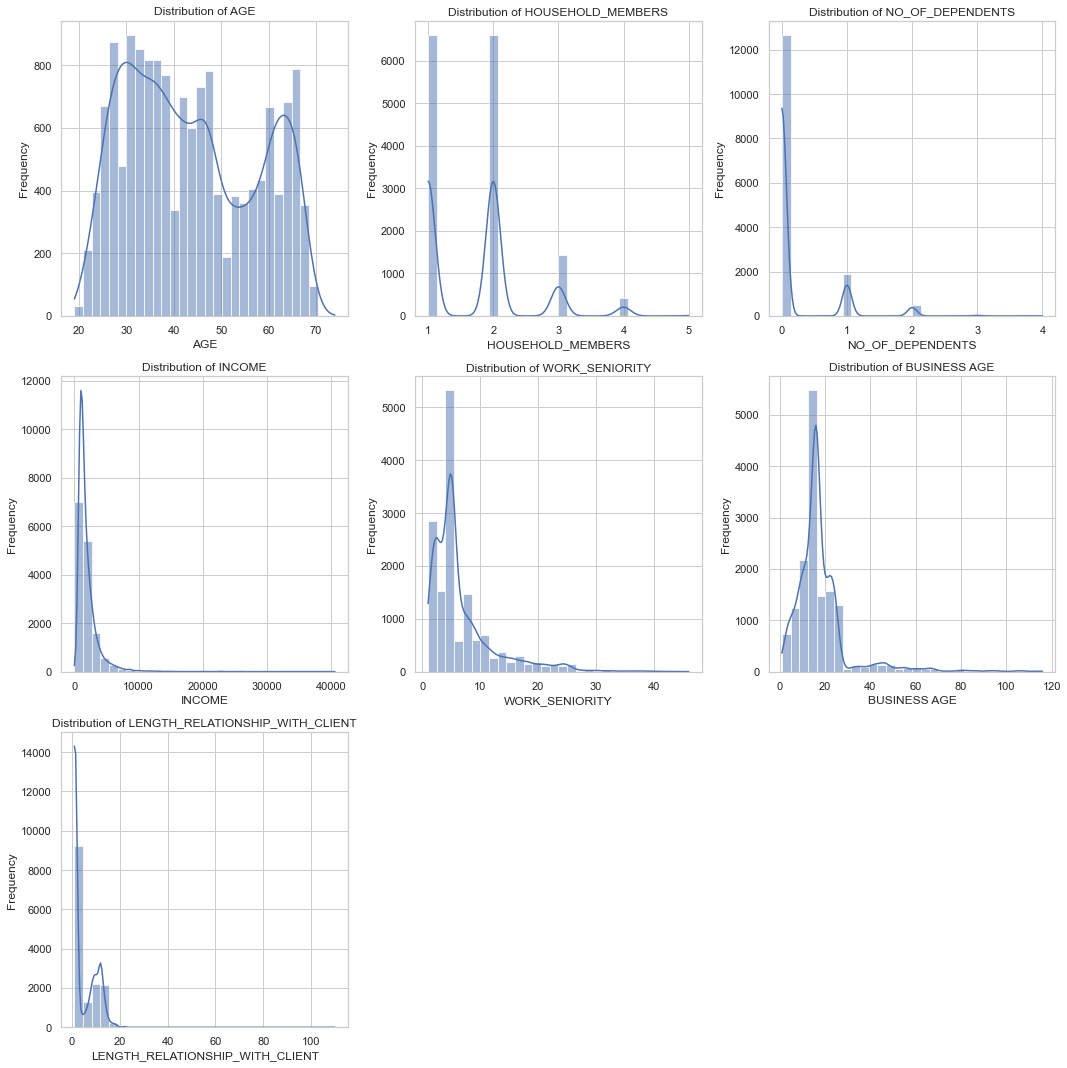

In [16]:
sns.set(style="whitegrid")

# Subset of numerical columns for visualization
numerical_columns = ['AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS','INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']

# Plotting histograms for the selected numerical features
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

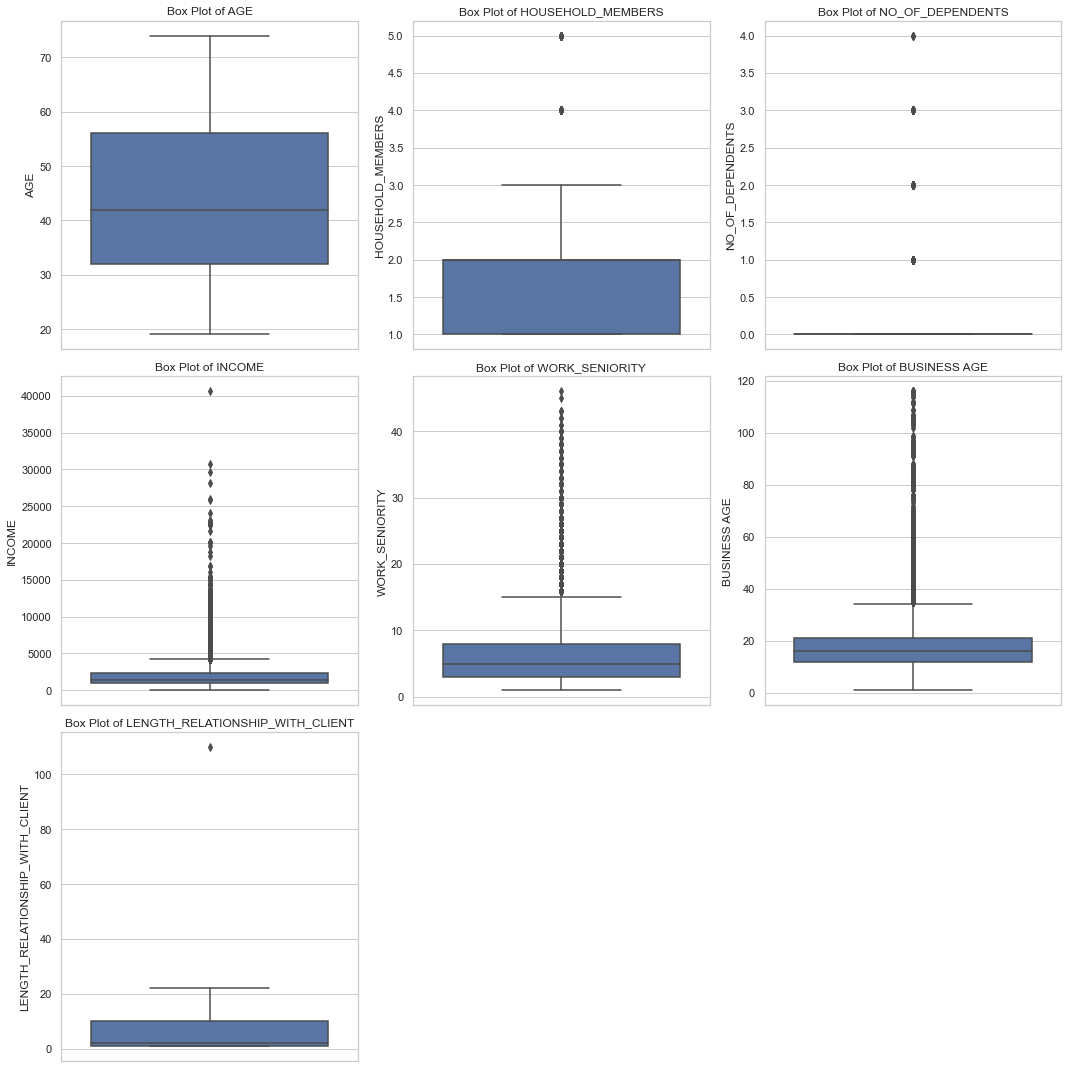

In [17]:
# Plotting box plots for the selected numerical features

plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

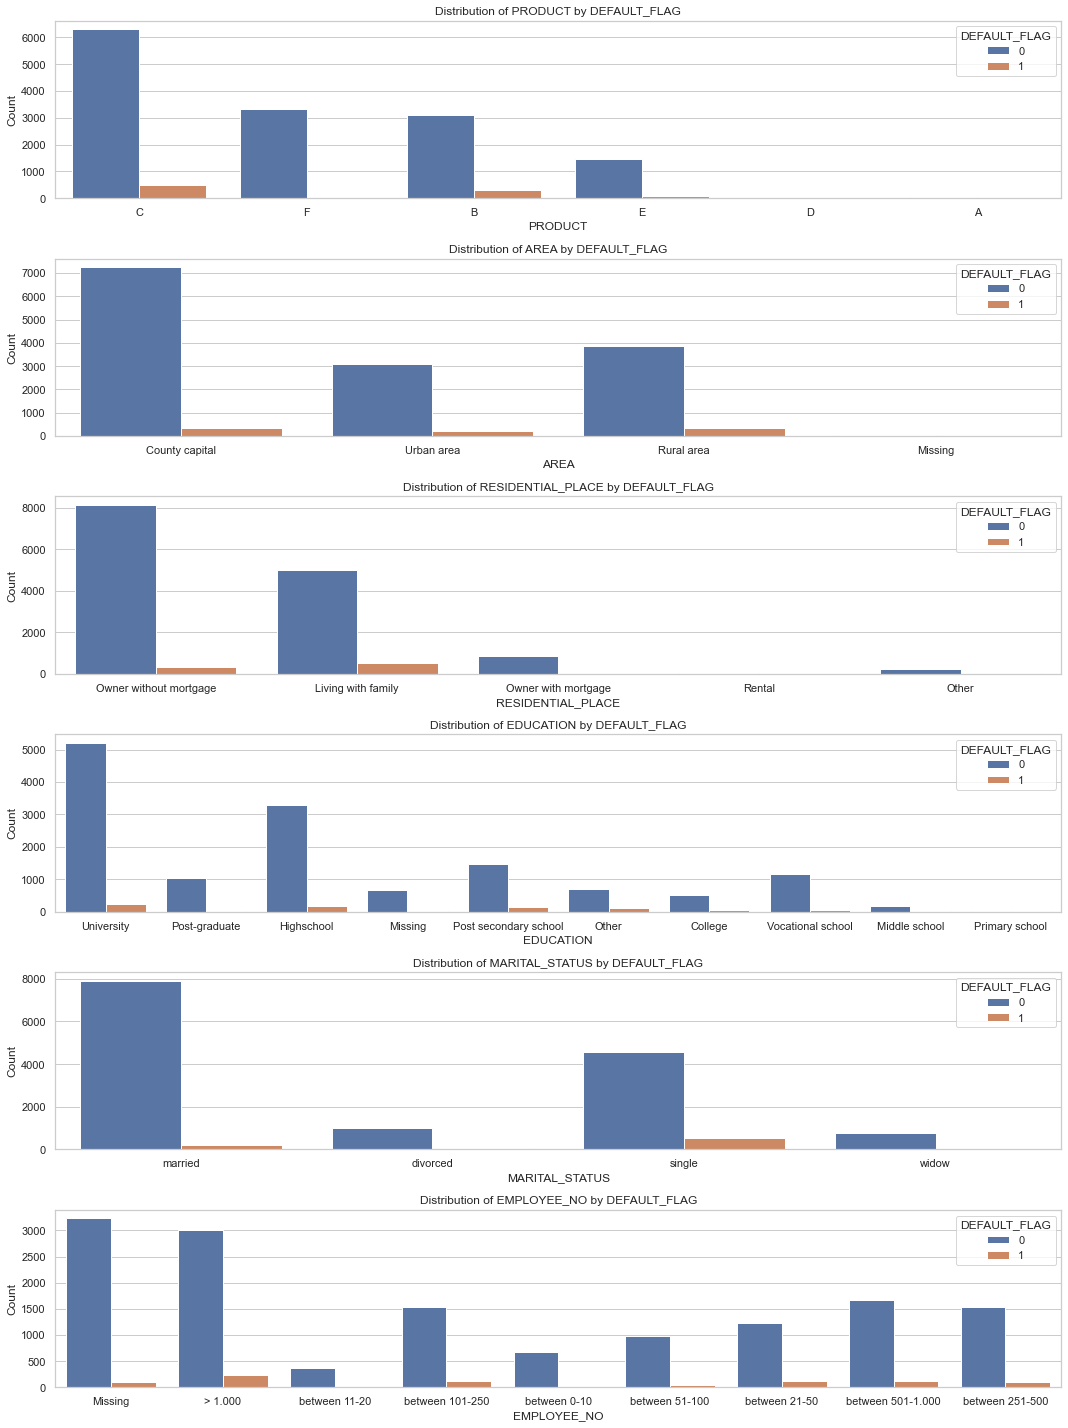

In [18]:
# Plotting bar plots for the selected categorical features against the DEFAULT_FLAG

categorical_columns = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS', 'EMPLOYEE_NO']
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 1, i)
    sns.countplot(x=column, hue='DEFAULT_FLAG', data=data)
    plt.title(f'Distribution of {column} by DEFAULT_FLAG')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='DEFAULT_FLAG', loc='upper right')

plt.tight_layout()
plt.show()

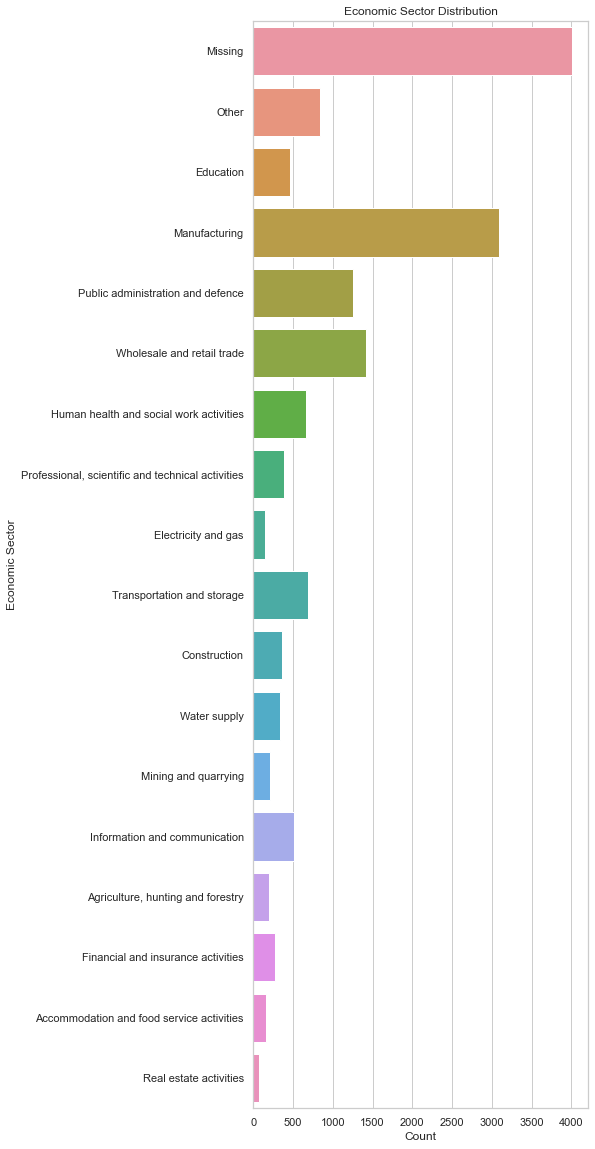

In [19]:
# I have changed the orientation of the plot so that the values on the axis can be readable
plt.figure(figsize=(6, 20)) 
sns.countplot(y='ECONOMIC_SECTOR', data=data) 
plt.title('Economic Sector Distribution')
plt.xlabel('Count')
plt.ylabel('Economic Sector') 
plt.show()

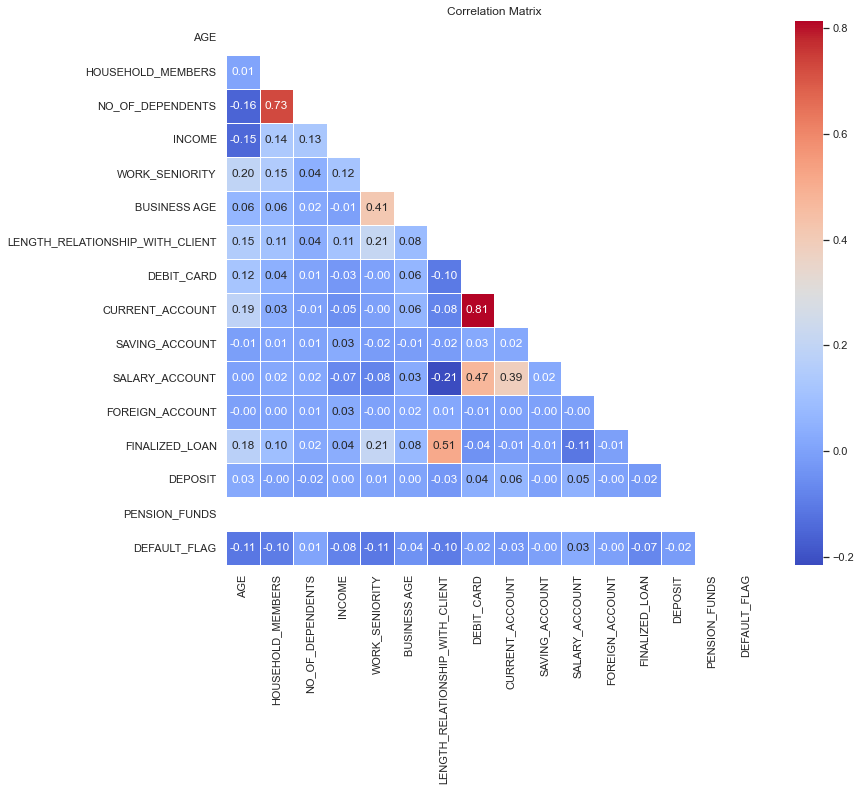

In [20]:
# Correlation matrix
corr = data.corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))

# Heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [277]:
# Low variance columns: These columns are highly skewed with a dominant value, reducing their potential predictive power.
columns_to_remove_low_variance = ['SAVING_ACCOUNT', 'FOREIGN_ACCOUNT', 'DEPOSIT', 'PENSION_FUNDS']

# High proportion of missing values: These columns have a significant number of 'MISSING' entries, which might not be informative.
columns_to_remove_high_missing = ['ECONOMIC_SECTOR', 'EMPLOYEE_NO']

# Columns to remove due to concerns of high correlation or redundancy
columns_to_remove_correlation_concerns = ['HOUSEHOLD_MEMBERS', 'DEBIT_CARD']

# All columns to remove
columns_to_remove = columns_to_remove_low_variance + columns_to_remove_high_missing + columns_to_remove_correlation_concerns

# Removing the columns from the dataset
data_cleaned = data.drop(columns=columns_to_remove)


data_cleaned.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,0,1245.0,5,16,1,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,0,1380.0,5,16,8,0,0,0,0
2,F,30,Urban area,Living with family,University,married,0,1131.0,2,6,1,1,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,0,1730.0,9,13,2,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,0,1189.0,5,16,1,1,0,0,0


In [286]:
# Let's check the rows, which are duplicated. We will not remove them, because they may have some value to our model
data_cleaned[data_cleaned.duplicated()].shape[0]


65

In [283]:
# I have removed rows with 'Missing' values in 'AREA'
data_no_missing_area = data_cleaned[data_cleaned['AREA'] != 'Missing']

rows_after_removal = data_no_missing_area.shape[0]
rows_removed = data_cleaned.shape[0] - rows_after_removal

rows_removed, rows_after_removal

(33, 15064)

In [303]:
#Let's see the distribution of education in the groups:
education_data_before=data_no_missing_area.groupby("EDUCATION").size().reset_index(name="count_before")
education_data_before

,EDUCATION,count_before
0,College,561
1,Highschool,3444
2,Middle school,195
3,Missing,688
4,Other,817
5,Post secondary school,1617
6,Post-graduate,1042
7,Primary school,28
8,University,5446
9,Vocational school,1226


In [248]:
data_without_missing_education=data_no_missing_area[data_no_missing_area['EDUCATION']!="Missing"]
missing_education_median_incomes=data_without_missing_education.groupby("EDUCATION").median()["INCOME"].reset_index()

def impute_education(row):
    if row['EDUCATION'] == "Missing":
        min_income = float('inf')
        closest_education = "Missing"
        for i in range(len(missing_education_median_incomes)):
            temp = abs(missing_education_median_incomes.at[i, "INCOME"] - row["INCOME"])
            if temp < min_income:
                closest_education = missing_education_median_incomes.at[i, "EDUCATION"]
                min_income = temp
        return closest_education
    else:
        return row['EDUCATION']
data_no_missing_area_copy=data_no_missing_area.copy()

data_no_missing_area_copy.loc[:,'EDUCATION']=data_no_missing_area.apply(impute_education, axis=1)

# Lets see how the distribution looks like now, and how the proportion of education changed

array(['University', 'Post-graduate', 'Highschool', 'Primary school',
       'Vocational school', 'Post secondary school', 'Other', 'College',
       'Middle school'], dtype=object)

In [312]:
new_row = {'EDUCATION': 'Missing', 'count_after': 0}

education_data_after=data_no_missing_area_copy.groupby("EDUCATION").size().reset_index(name="count_after")
education_data_after=pd.concat([education_data_after.iloc[:3], pd.DataFrame([new_row]), education_data_after.iloc[3:]]).reset_index(drop=True)

education_data_before.merge(education_data_after,on="EDUCATION", suffixes=('_before', '_after')).assign(increase=lambda x: 100*(x['count_after']-x['count_before'])/ x['count_before'])

,EDUCATION,count_before,count_after,increase
0,College,561,585,4.278075
1,Highschool,3444,3464,0.580720
2,Middle school,195,266,36.410256
3,Missing,688,0,-100.000000
4,Other,817,850,4.039168
5,Post secondary school,1617,1735,7.297464
6,Post-graduate,1042,1187,13.915547
7,Primary school,28,157,460.714286
8,University,5446,5534,1.615865
9,Vocational school,1226,1286,4.893964


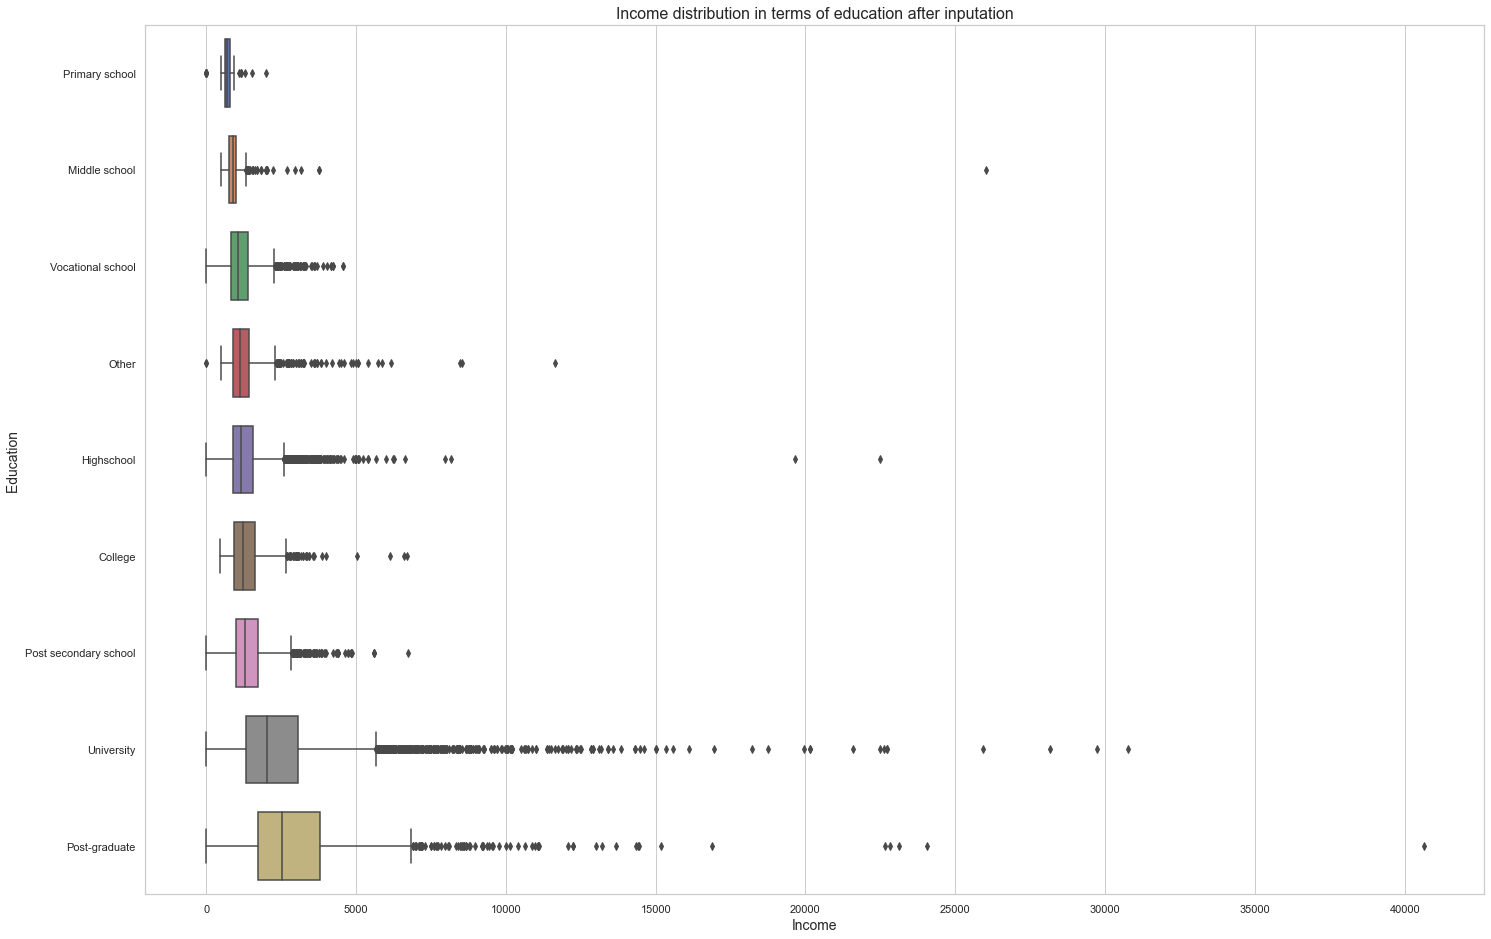

In [346]:
order_by_median = data_no_missing_area_copy.groupby("EDUCATION")["INCOME"].median().sort_values().index

plt.figure(figsize=(24, 16))
sns.boxplot(y="EDUCATION", x="INCOME", data=data_no_missing_area_copy, width=0.7, order=order_by_median)

plt.title('Income distribution in terms of education after inputation', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Education ', fontsize=14)
plt.show()

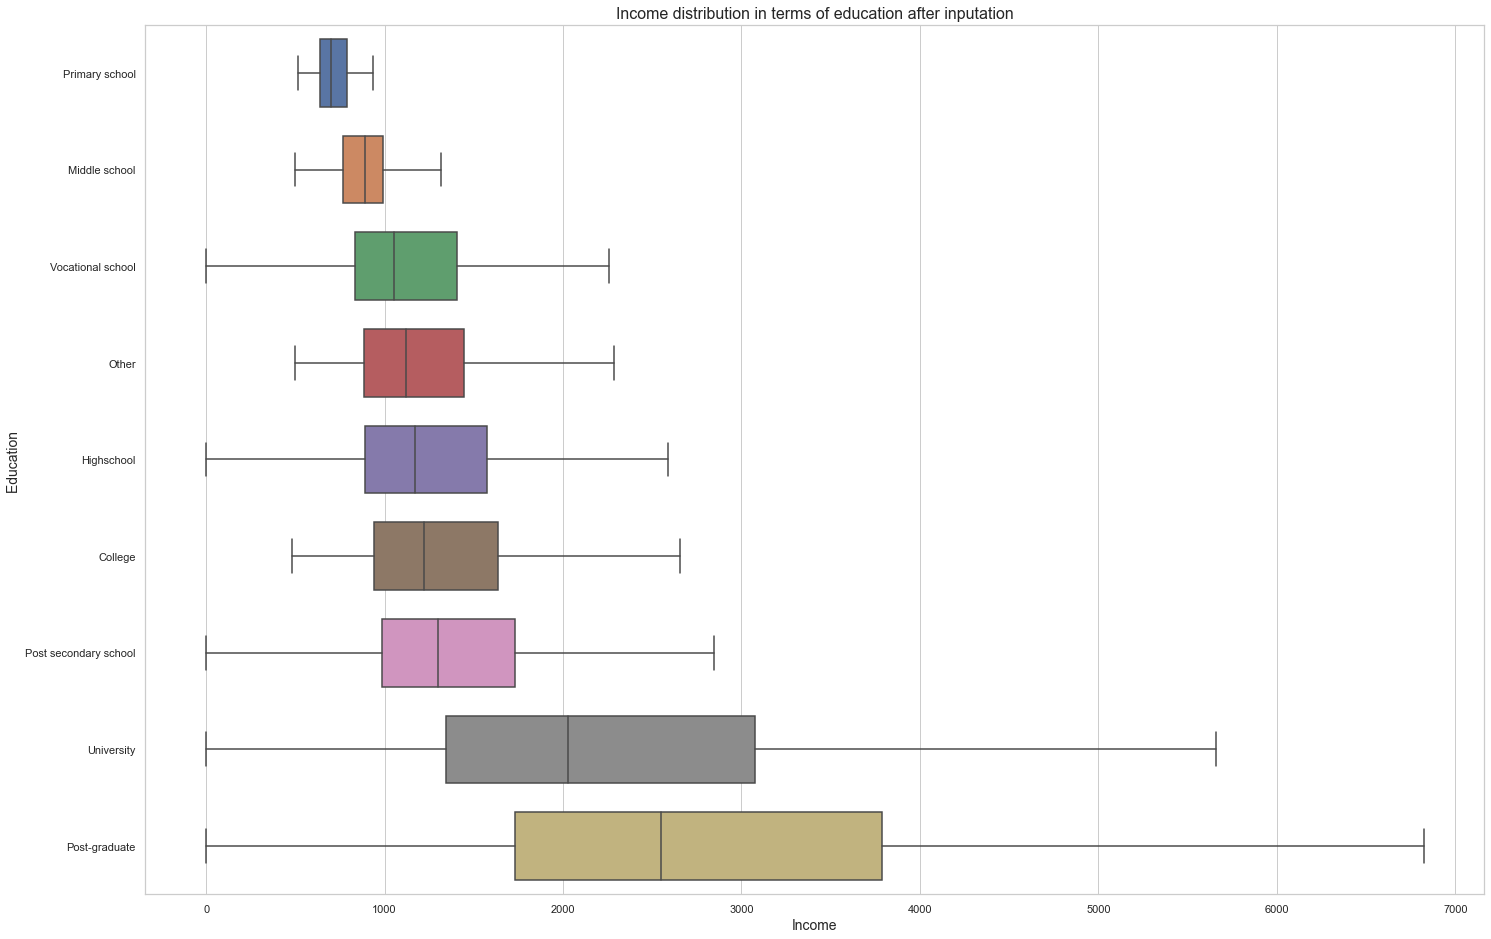

116

In [371]:
# Let's delete showfliers
plt.figure(figsize=(24, 16))
sns.boxplot(y="EDUCATION", x="INCOME", data=data_no_missing_area_copy, width=0.7, order=order_by_median,showfliers=False)

plt.title('Income distribution in terms of education after inputation', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Education ', fontsize=14)
plt.show()
data_no_missing_area["BUSINESS AGE"].max()

In [370]:
# Let's now focus on outliers. We will focus on lower percentile 1% and upper percentile 99% and change all these values
for col in ['AGE', 'WORK_SENIORITY', 'BUSINESS AGE']:
    lower_bound = data_no_missing_area_copy[col].quantile(0.01)
    upper_bound = data_no_missing_area_copy[col].quantile(0.99)
    data_no_missing_area_copy[col] = data_no_missing_area_copy[col].clip(lower=lower_bound, upper=upper_bound)

71.0

In [372]:
# Let's change outliers for Income
income_upper_bound = data_no_missing_area_copy['INCOME'].quantile(0.99)
income_median = data_no_missing_area_copy['INCOME'].median()
data_no_missing_area_copy['INCOME'] = np.where(data_no_missing_area_copy['INCOME'] > income_upper_bound, income_median, data_no_missing_area_copy['INCOME'])

In [373]:
# Deleting extraordinary outliers. Firstly let's consider length_relationship_with_client

data_no_outlier_relationship=data_no_missing_area_copy[data_no_missing_area['LENGTH_RELATIONSHIP_WITH_CLIENT']<100]
rows_after_removal=data_no_outlier_relationship.shape[0]
rows_removed = data_no_missing_area_copy.shape[0] - rows_after_removal

rows_removed, rows_after_removal

(1, 15063)

In [305]:
# Now let's take the first column with types of products. We can clearly see that the products A and D have infinitesimal number of appearences
data_no_outlier_products=data_no_outlier_relationship[(data_no_outlier_relationship['PRODUCT']!='A') & (data_no_outlier_relationship['PRODUCT']!='D')]
rows_after_removal=data_no_outlier_products.shape[0]
rows_removed=data_no_outlier_relationship.shape[0]-rows_after_removal

rows_removed, rows_after_removal

(54, 15009)

C:\Users\jakub\AppData\Local\Temp\ipykernel_3368\4035302679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT_LOG'] = np.log1p(data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT'])


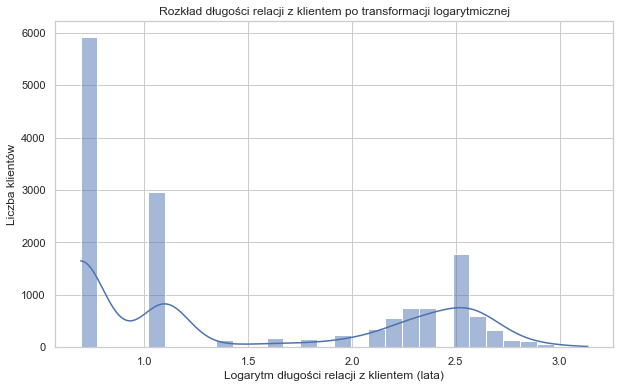

0.42767444728437

In [374]:
# Applying log transformation
data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT_LOG'] = np.log1p(data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT'])

# Plotting the distribution of the transformed LENGTH_RELATIONSHIP_WITH_CLIENT
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT_LOG'], kde=True, bins=30)
plt.title('Rozkład długości relacji z klientem po transformacji logarytmicznej')
plt.xlabel('Logarytm długości relacji z klientem (lata)')
plt.ylabel('Liczba klientów')
plt.show()

# Calculate the skewness after log transformation
length_relationship_log_skew = data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT_LOG'].skew()
length_relationship_log_skew